# Assignment 1 - Exploratory Data Analysis

## Instructions

For the First Assignment, we are going to be Performing Exploratory Data Analysis Using Python, R and Weka.

1. There are set of questions that may be similar for python and R but may be different for Weka.
2. The dataset used for Python/R are same but different for Weka.
3. For Task involving R use a different R notebook.
3. Each Task is presenting a challenge.

TEAM 18: Sheth, Urmi Manish(1002064934), Shah, Harsh Navinbhai (1002057387), Tadivaka, Sai Swetha (1002112726)

## Task 1: Python (40 Points)

Run this cell by default to load the dataset.

This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [2]:
import pandas as pd

movies_data = pd.read_csv("netflix_titles.csv")

movies_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Task 1A: 2 points
Display all the details about the dataset

In [15]:
import pandas as pd

df = pd.read_csv("C:\\Academic\\Data Mining\\summer2023Assignment1\\summer2023Assignment1\\Batch1\\Python\\netflix_titles.csv")

print('Top 5 records:\n',df.head())
print('Attributes in dataset\n',df.columns)
print('Bottom 5 records: \n',df.tail())
print('Total no. of rows:',df.shape[0])
print('Total no. of columns:',df.shape[1])
print('Datatypes of Attributes: \n',df.dtypes)
print('Information about the dataframe:\n',df.info())
print('Summary Statistics details: \n',df.describe())

Top 5 records:
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 

### Task 1B: 3 points
1. Check for null values within each column.
2. Fill the values for more than 100 missing columns with certain label such as No Director, Country Unavailable, etc. Drop the rows for the rest missing columns.

In [16]:
#Check for null values within each column

print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [17]:
for attribute,count in df.isnull().sum().items():
    if count > 100:
        if(attribute=="director"):
            replacedValue="No Director"
        elif(attribute=="country"):
            replacedValue="Country Unavailable"
        elif(attribute=="cast"):
            replacedValue="No Cast"   
        df[attribute].fillna(replacedValue, inplace=True)
    else:
        df.dropna(subset=[attribute], inplace=True)

In [18]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Task 1C: 5 points
Display a two horizontal bar chart side by side for Top 10 countries with total number of movies and TV shows.

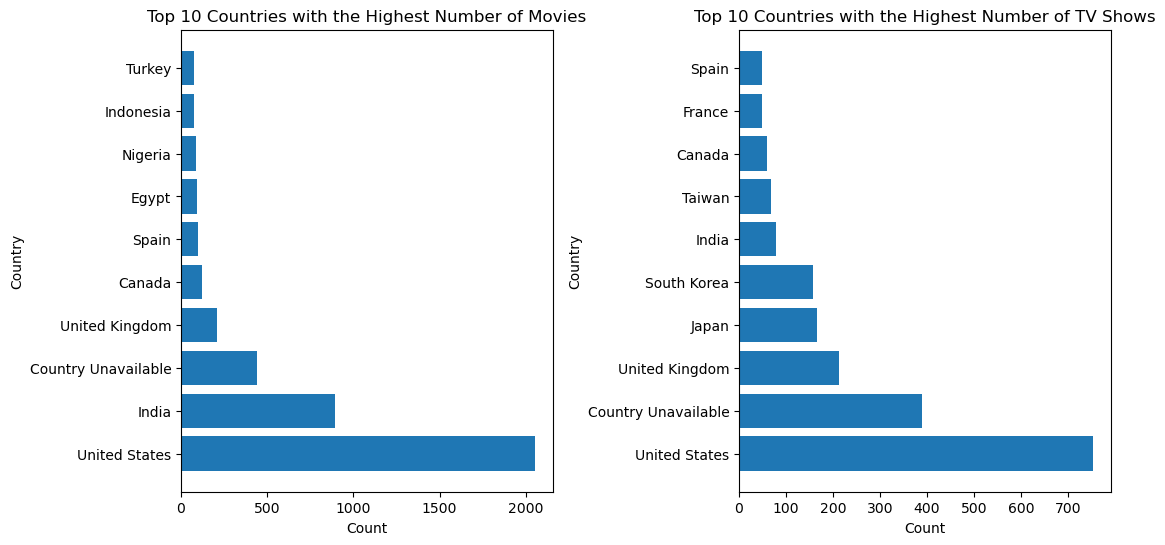

In [19]:
import matplotlib.pyplot as plt


movies_counts = df[df['type'] == 'Movie']['country'].value_counts().nlargest(10)
tv_shows_counts = df[df['type'] == 'TV Show']['country'].value_counts().nlargest(10)


fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 6))

axis1.barh(movies_counts.index, movies_counts.values)
axis1.set_xlabel('Count')
axis1.set_ylabel('Country')
axis1.set_title('Top 10 Countries with the Highest Number of Movies')


axis2.barh(tv_shows_counts.index, tv_shows_counts.values)
axis2.set_xlabel('Count')
axis2.set_ylabel('Country')
axis2.set_title('Top 10 Countries with the Highest Number of TV Shows')


plt.subplots_adjust(wspace=0.5)


plt.show()

### Task 1D: 4 points

Print the first row based on the longest duration time of a movie from each country column with its director, date_added, release_year, duration of the movie and its description. 

In [8]:
movies_data = df[df['type'] == 'Movie'].copy()
movies_data.loc[:, 'duration_in_mins'] = movies_data['duration'].str.replace(' min', '').astype(float).astype('Int64')

idx = movies_data.groupby('country')['duration_in_mins'].idxmax()

longest_duration_movies = movies_data.loc[idx, ['country','director', 'date_added', 'release_year', 'duration', 'description']]
print(longest_duration_movies)

                                                country  \
365                                   , France, Algeria   
2465                                          Argentina   
4947  Argentina, Brazil, France, Poland, Germany, De...   
1261                                   Argentina, Chile   
7362                             Argentina, Chile, Peru   
...                                                 ...   
6675                                          Venezuela   
7692                                Venezuela, Colombia   
569                                             Vietnam   
5612                                       West Germany   
2446                                           Zimbabwe   

                                   director         date_added  release_year  \
365                            Najwa Najjar      July 30, 2021          2014   
2465                      Alejandro Montiel       May 28, 2020          2020   
4947                           Diego Lerman      Ap

### Task 1E: 4 points
Display the titleof the movie, its director, the date it was added to the platform and the date it was officially released where the official release date and the date it was added to the plafform has same year.

In [21]:
movies= df[df['type'] == 'Movie'].copy()

movies['date_added'] = pd.to_datetime(movies['date_added'])
filtered_movies = movies[movies['release_year'] == movies['date_added'].dt.year]


print(filtered_movies[['title', 'director', 'date_added', 'release_year']])

                                 title  \
6     My Little Pony: A New Generation   
9                         The Starling   
12                        Je Suis Karl   
13    Confessions of an Invisible Girl   
18                           Intrusion   
...                                ...   
8765                                XX   
8781           Yo-Kai Watch: The Movie   
8782                       Yoga Hosers   
8786                      You Can Tutu   
8787         You Can’t Fight Christmas   

                                               director date_added  \
6                         Robert Cullen, José Luis Ucha 2021-09-24   
9                                        Theodore Melfi 2021-09-24   
12                                  Christian Schwochow 2021-09-23   
13                                        Bruno Garotti 2021-09-22   
18                                           Adam Salky 2021-09-22   
...                                                 ...        ...   
8765 

### Task 1F: 4 points
Display Director, the release year and number of movies and TV Shows directed by that director within a year and sort the results from highest.

In [10]:

movies_tvshows_data = df[df['type'].isin(['Movie', 'TV Show'])]
director_count = movies_tvshows_data.groupby(['director', 'release_year']).size().reset_index(name='count').sort_values('count', ascending = False)
desired_columns = ['director', 'release_year','count']
print(director_count[desired_columns])

                  director  release_year  count
3924           No Director          2020    405
3923           No Director          2019    401
3922           No Director          2018    386
3925           No Director          2021    295
3921           No Director          2017    258
...                    ...           ...    ...
2011  Hrishikesh Mukherjee          1975      1
2010  Hrishikesh Mukherjee          1972      1
2009          Hoyt Yeatman          2009      1
2008          Howard Zieff          1994      1
5947          Şenol Sönmez          2019      1

[5948 rows x 3 columns]


### Task 1G: 3 points
Display the title of the movie/TV shows, the Director, the date it was added to netflix and the category it was listed in from the data which belongs to Documentary/Docuseries category.

In [11]:
categorized_data = df[(df['type'].isin(['Movie', 'TV Show'])) & (df['listed_in'].isin(['Documentaries', 'Docuseries']))] 
print(categorized_data[['title', 'director', 'date_added', 'listed_in']])

                                            title  \
0                            Dick Johnson Is Dead   
45                         My Heroes Were Cowboys   
117                                 Final Account   
181     Turning Point: 9/11 and the War on Terror   
221   Bob Ross: Happy Accidents, Betrayal & Greed   
...                                           ...   
8723                     What Makes a Psychopath?   
8737                   Why Are We Getting So Fat?   
8738                                     Why Knot   
8739           Why We Fight: The Battle of Russia   
8763              WWII: Report from the Aleutians   

                                    director          date_added  \
0                            Kirsten Johnson  September 25, 2021   
45                               Tyler Greco  September 16, 2021   
117                             Luke Holland   September 2, 2021   
181                              No Director   September 1, 2021   
221                    

### Task 1H : 4 points

Display title, the date it was added to the plaform, type of category it was listed in and its description for Family Dramas.

Hint: Use Description to look for type of Drama.

In [41]:

family_drama_movies = movies_tvshows_data[movies_tvshows_data['description'].str.contains('Family Drama', case=False)]
filtered_family_data = family_drama_movies[['title', 'date_added', 'listed_in','description']]
print(filtered_family_data)


                        title         date_added  \
2275                     Hook       July 5, 2020   
2780                   Curtiz     March 25, 2020   
2880  I Am Not Okay With This  February 26, 2020   
2997          October Faction   January 23, 2020   
3176  Three Days of Christmas   December 6, 2019   
6993             Hope Aur Hum  September 1, 2018   
7039                 I Am Me!      March 3, 2017   

                                              listed_in  \
2275  International TV Shows, Romantic TV Shows, TV ...   
2780                       Dramas, International Movies   
2880        TV Comedies, TV Dramas, TV Sci-Fi & Fantasy   
2997        TV Action & Adventure, TV Dramas, TV Horror   
3176  International TV Shows, Spanish-Language TV Sh...   
6993         Children & Family Movies, Comedies, Dramas   
7039  International TV Shows, Spanish-Language TV Sh...   

                                            description  
2275  Despite their fathers' rivalry, two university

### Task 1I: 5 points

Plot the Distribution of TV shows based on their number of seasons.(horizontal bar chart)
1. Less than 3 seasons
2. 3 Seasons
3. 4 Seasons
4. 5 to less than 10 seasons.
5. 10 or more seasons.

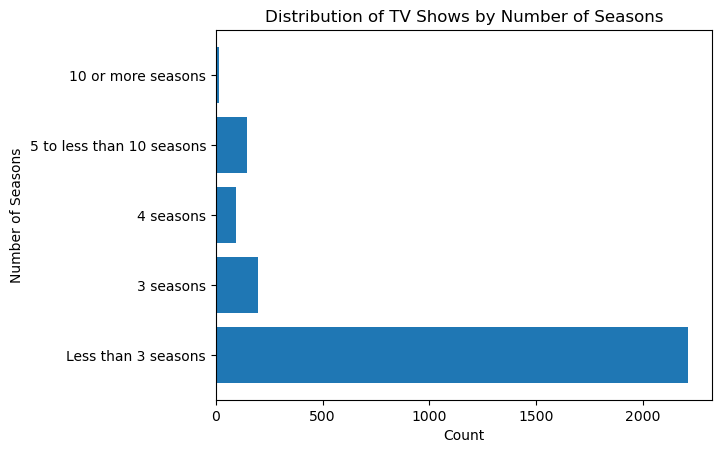

In [17]:

tv_shows = df[df['type'] == 'TV Show']

# Group TV shows by the number of seasons
season_counts = tv_shows['duration'].value_counts()
# print(season_counts.head())
# print(season_counts.index)


season_counts.index = season_counts.index.str.replace("Seasons", "")
season_counts.index = season_counts.index.str.replace("Season", "")
season_counts.index = pd.to_numeric(season_counts.index,errors='coerce')
# print(season_counts.index)

# Define the season categories
categories = {
    'Less than 3 seasons': (season_counts.values[season_counts.index < 3].sum()),
    '3 seasons': (season_counts.values[season_counts.index == 3].sum()),
    '4 seasons': (season_counts.values[season_counts.index == 4].sum()),
    '5 to less than 10 seasons': (season_counts.values[(season_counts.index >= 5) & (season_counts.index < 10)].sum()),
    '10 or more seasons': (season_counts.values[season_counts.index >= 10].sum())
}


# print(list(categories.keys()), list(categories.values()))
# Create a horizontal bar chart
plt.barh(list(categories.keys()), list(categories.values()))
plt.xlabel('Count')
plt.ylabel('Number of Seasons')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.show()


### Task 1J: 6 points

Display a side by side pie chart where it shows different rating a movie and a TV show belongs to.

Movie:
1. Uncut/Not rated
2. Restricted
3. Parentel guidance
4. General audience
5. Adults only

TV Show:
1. All Children
2. Older Children
3. Parentel Presence
4. General audience
5. Mature

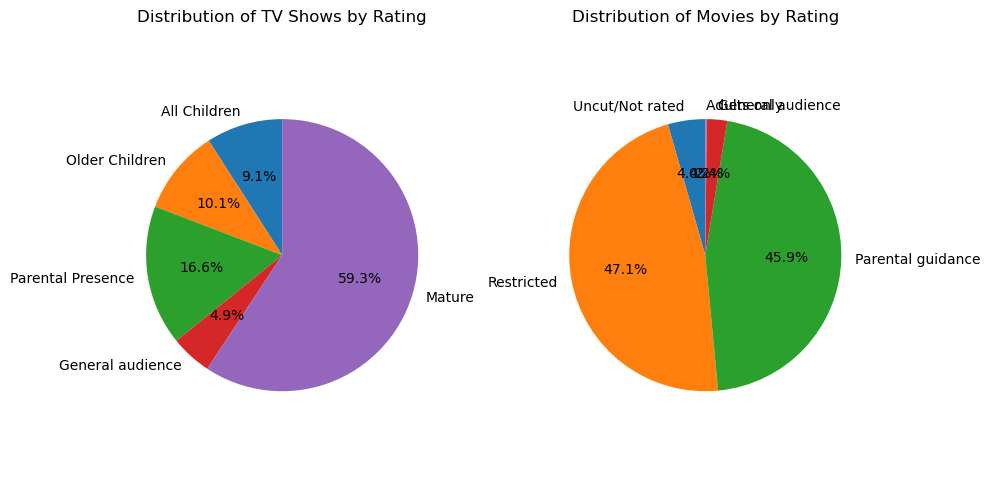

In [18]:

import matplotlib.pyplot as plt

tv_shows = df[df['type'] == 'TV Show']
tv_shows_rating_count = tv_shows['rating'].value_counts()

movies= df[df['type'] == 'Movie']
movies_rating_count = movies['rating'].value_counts()

tv_shows_categories = {
    'All Children': (tv_shows_rating_count.values[tv_shows_rating_count.index == 'TV-Y'])[0],
    'Older Children': (tv_shows_rating_count.values[tv_shows_rating_count.index == 'TV-Y7'] +tv_shows_rating_count.values[tv_shows_rating_count.index == 'TV-Y7-FV'])[0] ,
    'Parental Presence': (tv_shows_rating_count.values[tv_shows_rating_count.index == 'TV-PG'])[0],
    'General audience': (tv_shows_rating_count.values[tv_shows_rating_count.index == 'TV-G'])[0],
    'Mature': (tv_shows_rating_count.values[tv_shows_rating_count.index == 'TV-MA'])[0]
}

movies_categories = {
    'Uncut/Not rated': (movies_rating_count.values[movies_rating_count.index == 'NR'])[0],
    'Restricted': (movies_rating_count.values[movies_rating_count.index == 'R'])[0] ,
    'Parental guidance': (movies_rating_count.values[movies_rating_count.index == 'PG'] +movies_rating_count.values[movies_rating_count.index == 'PG-13'])[0],
    'General audience': (movies_rating_count.values[movies_rating_count.index == 'G'])[0],
    'Adults only': (movies_rating_count.values[movies_rating_count.index == 'NC-17'])[0]
}

# print(list(movies_categories.keys()), list(movies_categories.values()))
labels_tv = list(tv_shows_categories.keys())
sizes_tv = list(tv_shows_categories.values())

labels_movies = list(movies_categories.keys())
sizes_movies = list(movies_categories.values())

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

axis1.pie(sizes_tv, labels=labels_tv, autopct='%1.1f%%', startangle=90)
axis1.axis('equal')
axis1.set_title('Distribution of TV Shows by Rating')

axis2.pie(sizes_movies, labels=labels_movies, autopct='%1.1f%%', startangle=90)
axis2.axis('equal')
axis2.set_title('Distribution of Movies by Rating')

plt.tight_layout()
plt.show()
